In [13]:
number_of_amp = 0

In [19]:
import random 

def RandomAmplification(circ, c): 
    """
    Input: a circuit, and scaling factor between 1 and 3 (inclusive)
    Output: circuit with amplified error rate using adding-pair-of-gates tactic
    """
    
    #probability to add a pair of gates 
    g = (c-1)/2
    
    #iterating over the circuit in string representation
    
    
    newqasm_str=""
    circ_str=circ.qasm()
    
    qregname=circ.qregs[0].name
    
    for line in iter(circ_str.splitlines()):
        
        if line.startswith('cx') or line.startswith('u3'):
            
            #doing a toss to see if we have to amplify 
            if random.randint(1,101) <= 100*g : 
                global number_of_amp
                number_of_amp+=1
                
                #adding the original line first 
                ##barrier 
                barrier ="""barrier q[0],q[1];"""
                newqasm_str+= barrier + '\n' + line + '\n'+ barrier + '\n'
                if line.startswith('cx'):
                    newqasm_str += cXPairAdder(line)
                else: 
                    newqasm_str += u3PairAdder(line)
            else: 
                newqasm_str+=line+"\n"
        else:
            newqasm_str+=line+"\n"

    circo=QuantumCircuit().from_qasm_str(newqasm_str)
    
    return circo 


In [20]:
def cXPairAdder(orig_gate_str): 
    """
    Input: a qasm string corresponding to a gate
    Output: a pair of gates in qasm string representation to amplify error in the given gate by factor of 3
    """
    #barrier for 2 qubit circuit only
    barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + orig_gate_str +'\n' +barrier + '\n'+orig_gate_str + '\n' + barrier + '\n'

In [21]:
def u3PairAdder(orig_gate_str): 
    """
    Input: a qasm string corresponding to a gate
    Output: a pair of gates in qasm string representation to amplify error in the given gate by factor of 3
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    temp = []
    for string in strings: 
        temp = temp + string.split("*")
    strings = temp
    
    #Obtaining all useful information 
    gate = strings[0]
    qubit = strings[4]
    orig_angles = strings[1:4]
    
    #inverting angles 
    invert_angles = orig_angles 
    for i in range(len(invert_angles)): 
        if invert_angles[i][0] == '-': 
            invert_angles[i] = '' + invert_angles[i][1:]
        elif invert_angles[i] != '0': 
            invert_angles[i] = '-' + invert_angles[i]
    

    #creating inverted gate
    invert_gate_str = gate + '(' + invert_angles[0] + ',' + invert_angles[1] + ',' + invert_angles[2] + ')' + qubit
    
    #barrier 
    barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + invert_gate_str + '\n'+ barrier + '\n' + orig_gate_str + '\n' + barrier + '\n'
    

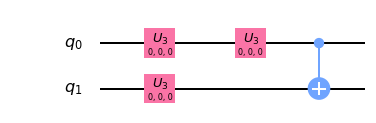

In [22]:
from qiskit import QuantumCircuit 

circ = QuantumCircuit(2)
circ.u3(0,0,0, 0)
circ.u3(0,0,0, 1)
circ.u3(0,0,0, 0)
circ.cx(0,1)
circ.draw(output = 'mpl')


In [25]:
number_of_amp = 0
for i in range(1000): 
    if (i%10) == 0: 
        print('Number of samples are ' + str(i) + ' and number of gates amplified is ' + str(number_of_amp))
    RandomAmplification(circ, 2)

Number of samples are 0 and number of gates amplified is 0
Number of samples are 10 and number of gates amplified is 19
Number of samples are 20 and number of gates amplified is 38
Number of samples are 30 and number of gates amplified is 59
Number of samples are 40 and number of gates amplified is 79
Number of samples are 50 and number of gates amplified is 96
Number of samples are 60 and number of gates amplified is 116
Number of samples are 70 and number of gates amplified is 140
Number of samples are 80 and number of gates amplified is 160
Number of samples are 90 and number of gates amplified is 177
Number of samples are 100 and number of gates amplified is 197
Number of samples are 110 and number of gates amplified is 217
Number of samples are 120 and number of gates amplified is 234
Number of samples are 130 and number of gates amplified is 252
Number of samples are 140 and number of gates amplified is 276
Number of samples are 150 and number of gates amplified is 298
Number of 

KeyboardInterrupt: 